<a href="https://colab.research.google.com/github/Shamiul-693/-Exploratory-Data-Analysis-and-Classification-Algorithms-on-Mushroom-Dataset/blob/main/Exploratory_Data_Analysis_and_Classification_Algorithms_on_Mushroom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("/content/drive/MyDrive/ Exploratory Data Analysis and Classification Algorithms on Mushroom  Dataset/mushrooms.csv")

In [5]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
data.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


#Stacked bar chart for class vs other features

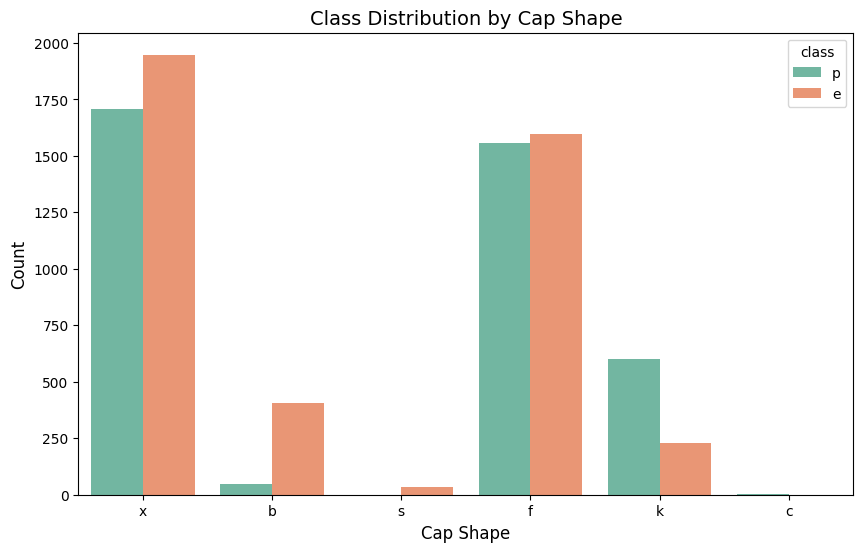

In [9]:
mushroom_data = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
sns.countplot(x='cap-shape', hue='class', data=mushroom_data, palette="Set2")
plt.title('Class Distribution by Cap Shape', fontsize=14)
plt.xlabel('Cap Shape', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#Barplot for cap-color distribution

<ipython-input-10-b98a152f9938>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='cap-color', data=mushroom_data, order=mushroom_data['cap-color'].value_counts().index, palette='muted')


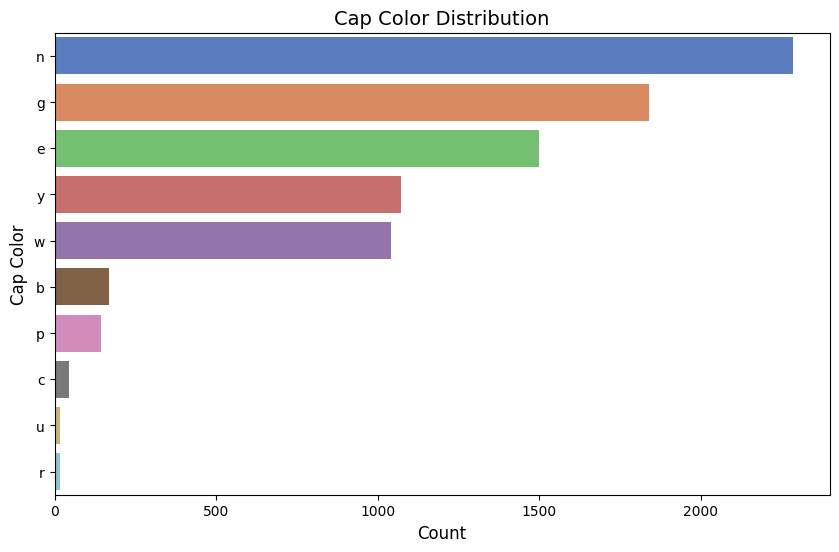

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(y='cap-color', data=mushroom_data, order=mushroom_data['cap-color'].value_counts().index, palette='muted')
plt.title('Cap Color Distribution', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Cap Color', fontsize=12)
plt.show()

#Violin plot for bruises and class distribution

<ipython-input-11-9460653b3926>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='class', y='bruises_encoded', data=mushroom_data, palette='Set2')


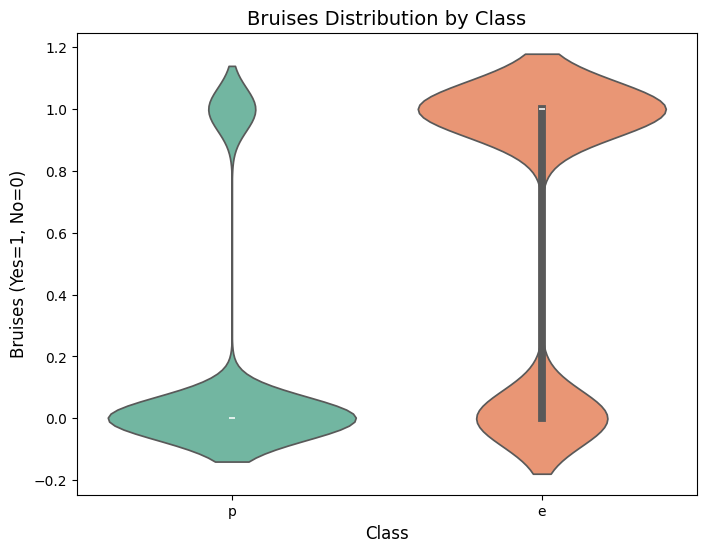

In [11]:
from sklearn.preprocessing import LabelEncoder

# Label encode 'bruises' column (Yes=1, No=0)
le = LabelEncoder()
mushroom_data['bruises_encoded'] = le.fit_transform(mushroom_data['bruises'])

# Violin plot for bruises encoded by class
plt.figure(figsize=(8, 6))
sns.violinplot(x='class', y='bruises_encoded', data=mushroom_data, palette='Set2')
plt.title('Bruises Distribution by Class', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Bruises (Yes=1, No=0)', fontsize=12)
plt.show()

#Bar chart for bruises (yes/no) distribution

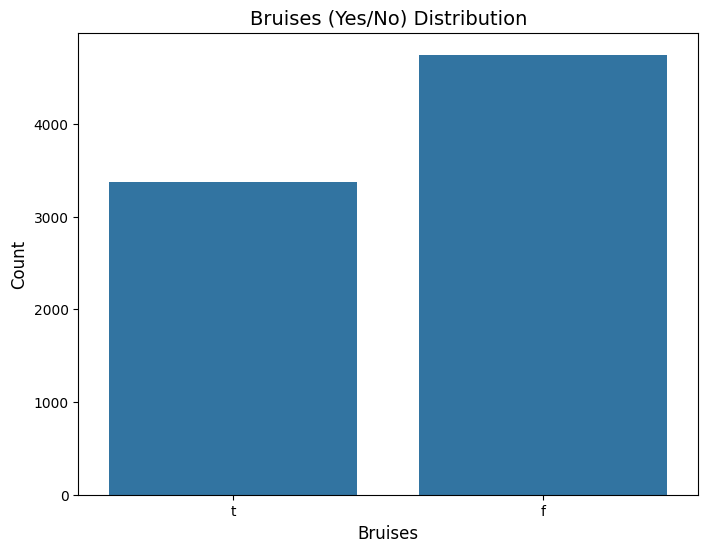

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='bruises', data=mushroom_data)
plt.title('Bruises (Yes/No) Distribution', fontsize=14)
plt.xlabel('Bruises', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#Heatmap for odor vs class distribution

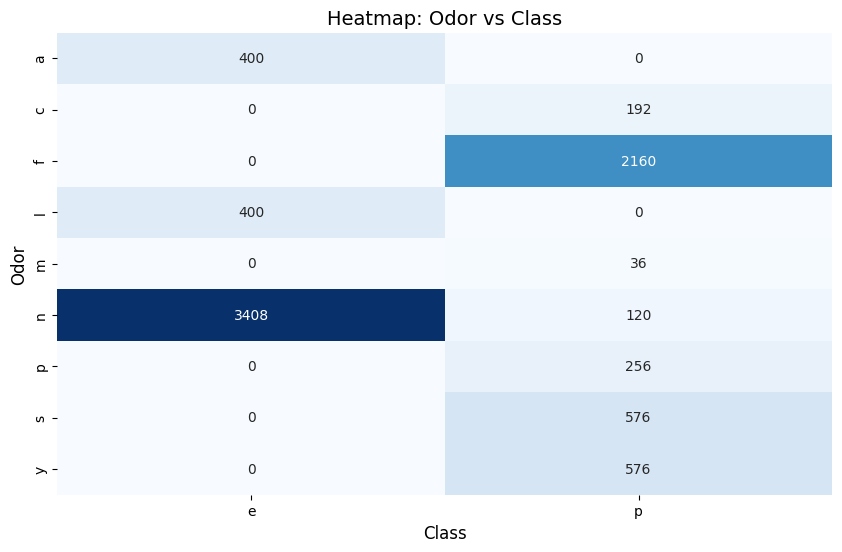

In [13]:
odor_class_pivot = pd.crosstab(mushroom_data['odor'], mushroom_data['class'])
plt.figure(figsize=(10, 6))
sns.heatmap(odor_class_pivot, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title('Heatmap: Odor vs Class', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Odor', fontsize=12)
plt.show()

#Bar chart for gill size distribution

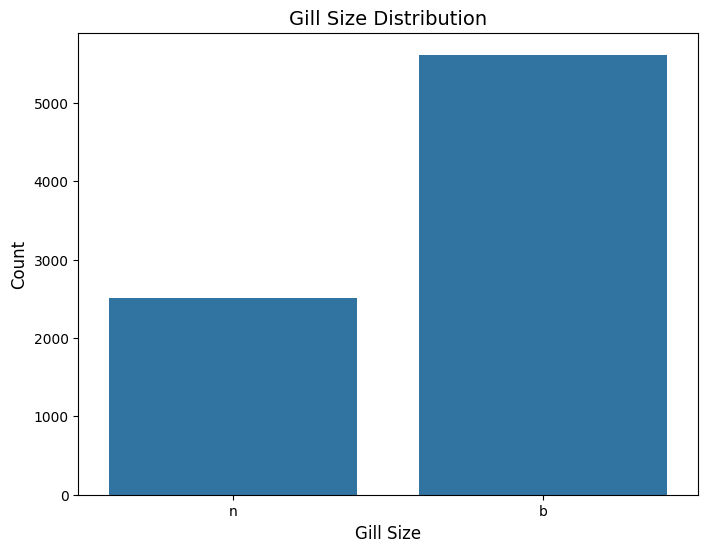

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gill-size', data=mushroom_data)
plt.title('Gill Size Distribution', fontsize=14)
plt.xlabel('Gill Size', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#Bar chart for stalk root distribution

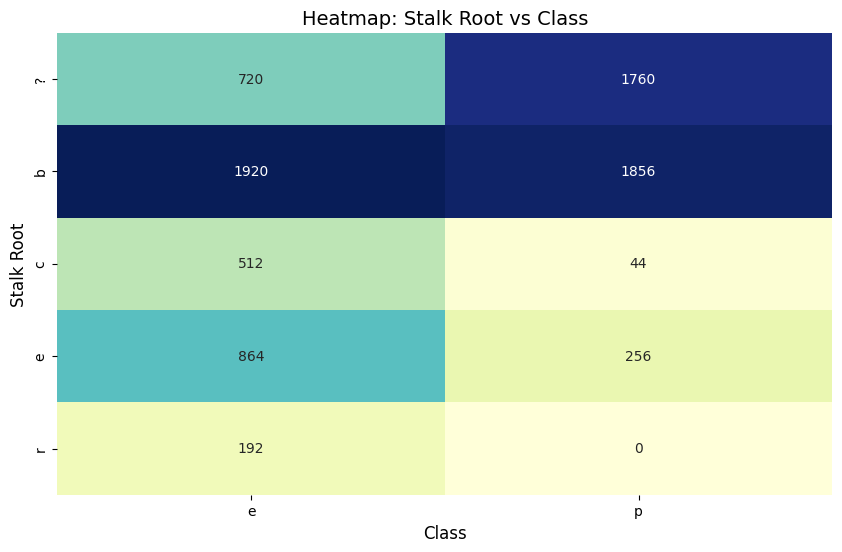

In [15]:
stalk_root_class_pivot = pd.crosstab(mushroom_data['stalk-root'], mushroom_data['class'])
plt.figure(figsize=(10, 6))
sns.heatmap(stalk_root_class_pivot, annot=True, cmap="YlGnBu", fmt="d", cbar=False)
plt.title('Heatmap: Stalk Root vs Class', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Stalk Root', fontsize=12)
plt.show()

#Bar chart for stalk color above ring

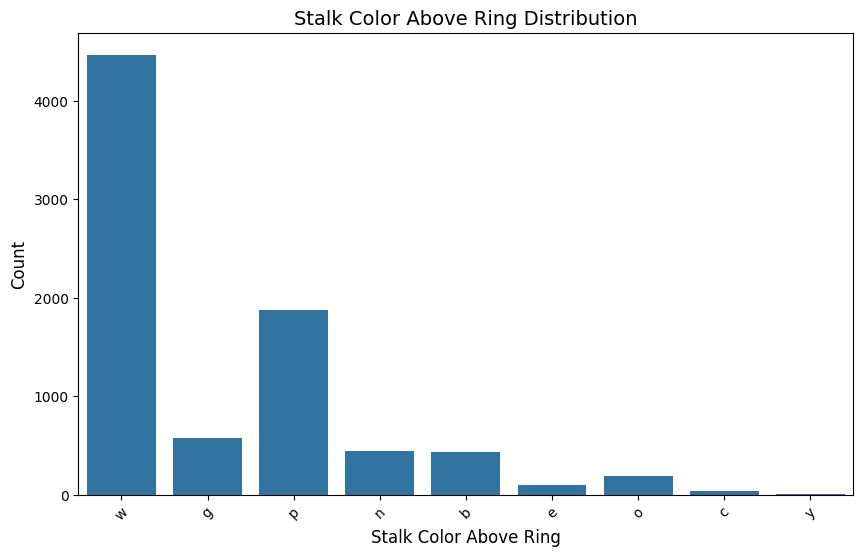

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='stalk-color-above-ring', data=mushroom_data)
plt.title('Stalk Color Above Ring Distribution', fontsize=14)
plt.xlabel('Stalk Color Above Ring', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#Bar plot for spore print color distribution

<ipython-input-17-ec757ee06ce1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='spore-print-color', data=mushroom_data, order=mushroom_data['spore-print-color'].value_counts().index, palette='husl')


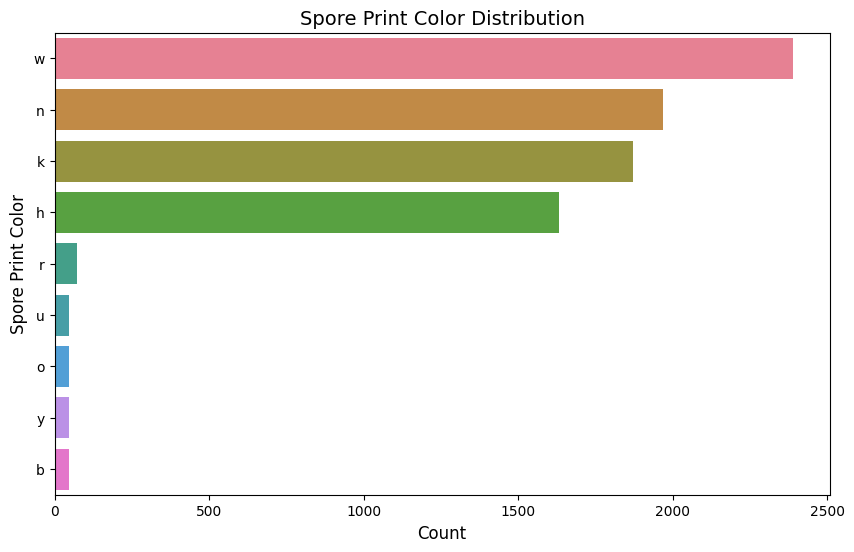

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(y='spore-print-color', data=mushroom_data, order=mushroom_data['spore-print-color'].value_counts().index, palette='husl')
plt.title('Spore Print Color Distribution', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Spore Print Color', fontsize=12)
plt.show()

#Bar chart for population distribution

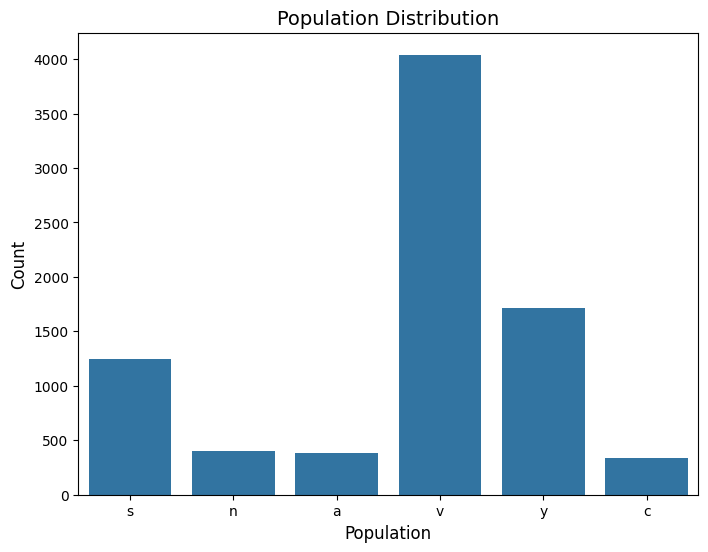

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='population', data=mushroom_data)
plt.title('Population Distribution', fontsize=14)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


#Bar chart for habitat distribution

<ipython-input-19-34dded8122f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='habitat', data=mushroom_data, palette='Set3')


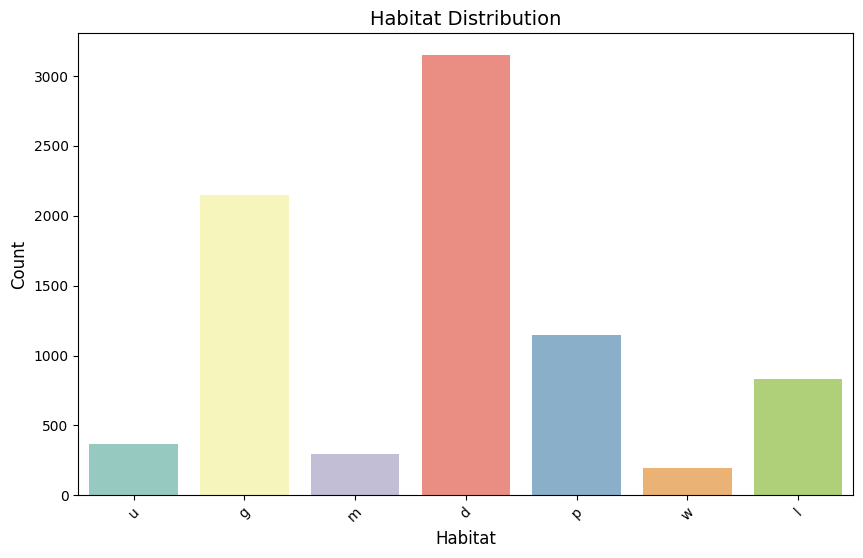

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='habitat', data=mushroom_data, palette='Set3')
plt.title('Habitat Distribution', fontsize=14)
plt.xlabel('Habitat', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#Bar chart for gill color distribution

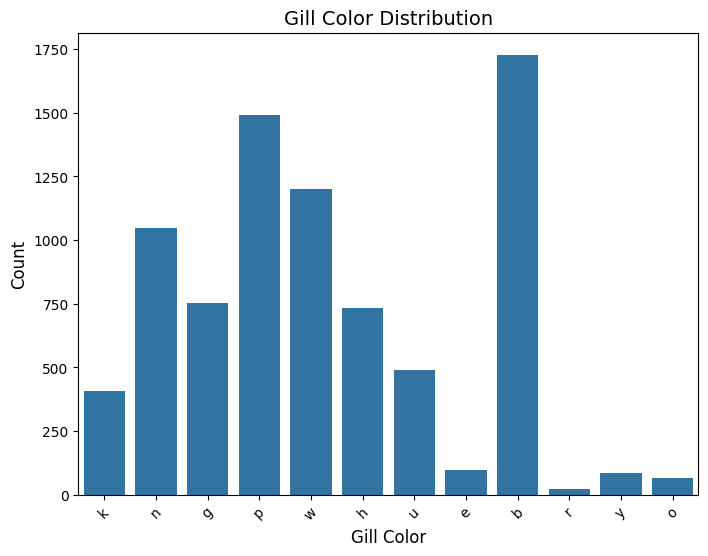

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gill-color', data=mushroom_data)
plt.title('Gill Color Distribution', fontsize=14)
plt.xlabel('Gill Color', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#Bar chart for ring number distribution

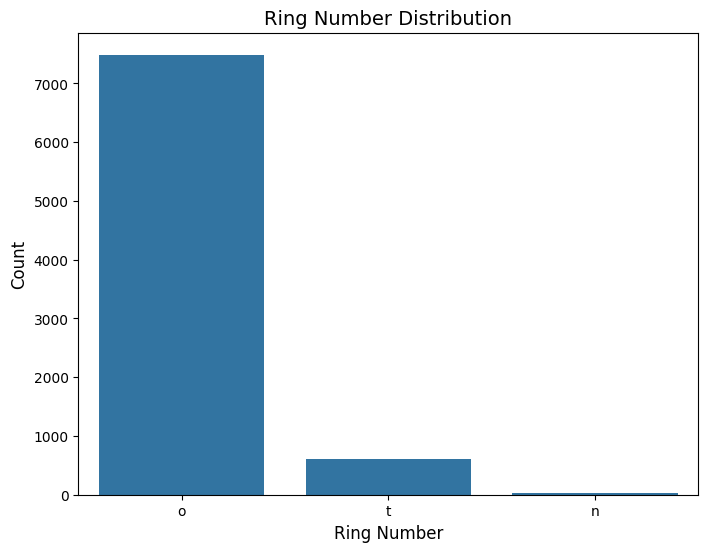

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ring-number', data=mushroom_data)
plt.title('Ring Number Distribution', fontsize=14)
plt.xlabel('Ring Number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#Bar chart for ring type distribution

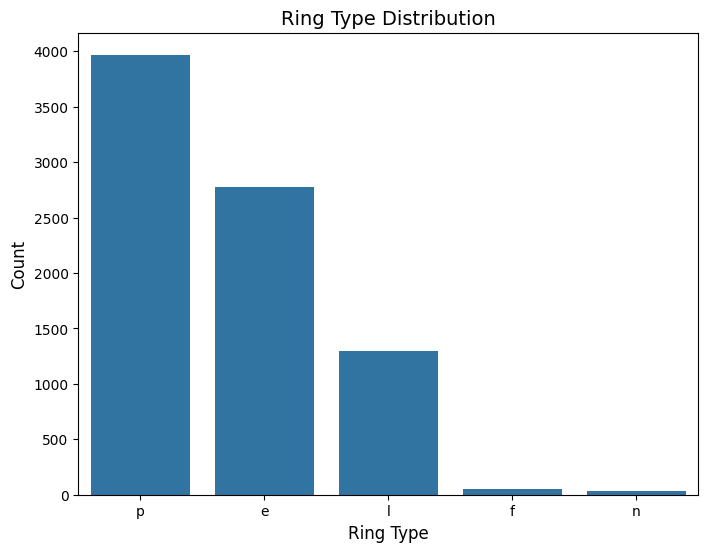

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ring-type', data=mushroom_data)
plt.title('Ring Type Distribution', fontsize=14)
plt.xlabel('Ring Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()